In [4]:
import json
import pandas as pd
import numpy as np
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    ConfusionMatrixDisplay
)
from matplotlib import pyplot as plt
import os
import torch

(721408,) (721408,) (721408,)
              precision    recall  f1-score   support

         0.0       0.94      0.83      0.88     92822
         1.0       0.32      0.63      0.43     17217
         2.0       0.79      0.58      0.67     19040

    accuracy                           0.76    129079
   macro avg       0.68      0.68      0.66    129079
weighted avg       0.83      0.76      0.79    129079



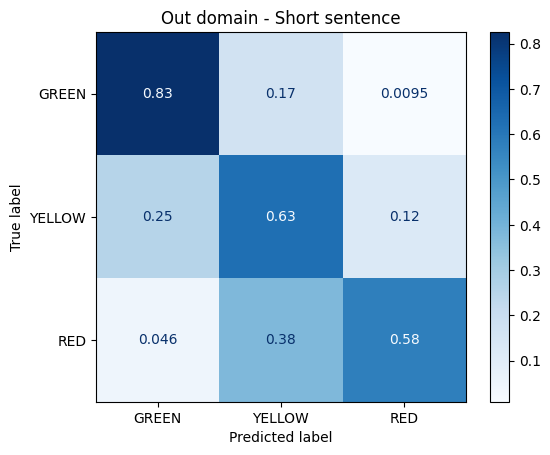

In [10]:
def convert_score_to_color(score, YELLOW_GREEN=75/50, RED_YELLOW=30/50):
    LABEL2ID = {"GREEN": 0, "YELLOW": 1, "RED":2}
    red_index = score < RED_YELLOW
    yellow_index = ((score >= RED_YELLOW).int() & (score < YELLOW_GREEN).int()).bool()
    green_index = score >= YELLOW_GREEN

    score[red_index] = LABEL2ID["RED"]
    score[yellow_index] = LABEL2ID["YELLOW"]
    score[green_index] = LABEL2ID["GREEN"]

    return score

def load_pred_and_label(pred_path, label_path):
    pred = np.load(pred_path)
    label = np.load(label_path)

    pred = np.concatenate(pred)
    label = np.concatenate(label)
    index = label != -1    
    print(index.shape, pred.shape, label.shape)
    
    return label[index], pred[index]
def cal_f1(pred_path, label_path, YELLOW_GREEN=70/50, RED_YELLOW=35/50):
    label, pred = load_pred_and_label(pred_path=pred_path, label_path=label_path)
    
    actual = convert_score_to_color(torch.from_numpy(label), YELLOW_GREEN=YELLOW_GREEN, RED_YELLOW=RED_YELLOW)
    predicted = convert_score_to_color(torch.from_numpy(pred), YELLOW_GREEN=YELLOW_GREEN, RED_YELLOW=RED_YELLOW)
    
    result = classification_report(y_true=actual, y_pred=predicted)
    cfs_mtr = confusion_matrix(actual, predicted)
    print(result)
    
    cfs_mtr = cfs_mtr / cfs_mtr.sum(axis=1, keepdims=True)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = cfs_mtr, display_labels = ["GREEN", "YELLOW", "RED"])
    

    return result, cm_display.plot(cmap='Blues')
    
pred_path = "/data/codes/prep_ps_pykaldi/exp/preds/phn_pred.npy"
label_path = "/data/codes/prep_ps_pykaldi/exp/preds/phn_label.npy"

res, cm_display = cal_f1(pred_path=pred_path, label_path=label_path, YELLOW_GREEN=85/50, RED_YELLOW=30/50)
plt.title("Out domain - Short sentence")
plt.show() 

(721408,) (721408,) (721408,)
              precision    recall  f1-score   support

         0.0       0.95      0.85      0.90     99093
         1.0       0.63      0.85      0.72     29986

    accuracy                           0.85    129079
   macro avg       0.79      0.85      0.81    129079
weighted avg       0.88      0.85      0.86    129079



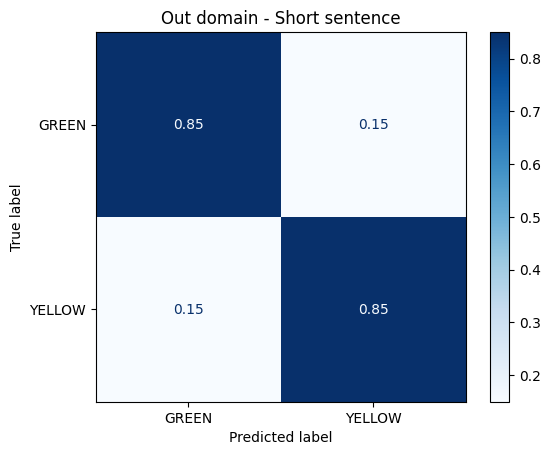

In [6]:
def convert_score_to_color(score, YELLOW_GREEN=75/50, RED_YELLOW=30/50):
    LABEL2ID = {"GREEN": 0, "YELLOW": 1, "RED":1}
    red_index = score < RED_YELLOW
    yellow_index = ((score >= RED_YELLOW).int() & (score < YELLOW_GREEN).int()).bool()
    green_index = score >= YELLOW_GREEN

    score[red_index] = LABEL2ID["RED"]
    score[yellow_index] = LABEL2ID["YELLOW"]
    score[green_index] = LABEL2ID["GREEN"]

    return score

def load_pred_and_label(pred_path, label_path):
    pred = np.load(pred_path)
    label = np.load(label_path)

    pred = np.concatenate(pred)
    label = np.concatenate(label)
    index = label != -1    
    print(index.shape, pred.shape, label.shape)
    
    return label[index], pred[index]
def cal_f1(pred_path, label_path, YELLOW_GREEN=70/50, RED_YELLOW=35/50):
    label, pred = load_pred_and_label(pred_path=pred_path, label_path=label_path)
    
    actual = convert_score_to_color(torch.from_numpy(label), YELLOW_GREEN=YELLOW_GREEN, RED_YELLOW=RED_YELLOW)
    predicted = convert_score_to_color(torch.from_numpy(pred), YELLOW_GREEN=YELLOW_GREEN, RED_YELLOW=RED_YELLOW)
    
    result = classification_report(y_true=actual, y_pred=predicted)
    cfs_mtr = confusion_matrix(actual, predicted)
    print(result)
    
    cfs_mtr = cfs_mtr / cfs_mtr.sum(axis=1, keepdims=True)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = cfs_mtr, display_labels = ["GREEN", "YELLOW"])
    

    return result, cm_display.plot(cmap='Blues')
    
pred_path = "/data/codes/prep_ps_pykaldi/exp/preds/phn_pred.npy"
label_path = "/data/codes/prep_ps_pykaldi/exp/preds/phn_label.npy"

res, cm_display = cal_f1(pred_path=pred_path, label_path=label_path, YELLOW_GREEN=80/50, RED_YELLOW=30/50)
plt.title("Out domain - Short sentence")
plt.show() 